In [171]:
#Imports

In [237]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv("E:/Courses/DataScience/practiceCSVfiles/titanic.csv")

In [238]:
df.shape

(1309, 14)

In [239]:
del df['body']

In [240]:
df.shape

(1309, 13)

In [172]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,Allen Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,St Louis MO
1,1,1,Allison Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal PQ / Chesterville ON
2,1,0,Allison Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal PQ / Chesterville ON
3,1,0,Allison Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal PQ / Chesterville ON
4,1,0,Allison Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal PQ / Chesterville ON


In [241]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [10]:
df.shape

(1309, 14)

In [204]:
train=df.sample(frac=0.8,random_state=50)

In [205]:
train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
513,2,1,Nasser Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C,NaN,NaN,New York NY
344,2,1,Bentham Miss. Lilian W,female,19.0,0,0,28404,13.0000,NaN,S,12,NaN,Rochester NY
264,1,1,Simonius-Blumer Col. Oberst Alfons,male,56.0,0,0,13213,35.5000,A26,C,3,NaN,Basel Switzerland
442,2,0,Hickman Mr. Leonard Mark,male,24.0,2,0,S.O.C. 14879,73.5000,NaN,S,NaN,NaN,West Hampstead London / Neepawa MB
482,2,1,Lehmann Miss. Bertha,female,17.0,0,0,SC 1748,12.0000,NaN,C,12,NaN,Berne Switzerland / Central City IA


In [242]:
train.shape

(1047, 13)

In [243]:
train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home_dest
513,2,1,Nasser Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,C,NaN,NaN,New York NY
344,2,1,Bentham Miss. Lilian W,female,19.0,0,0,28404,13.0000,S,12,NaN,Rochester NY
264,1,1,Simonius-Blumer Col. Oberst Alfons,male,56.0,0,0,13213,35.5000,C,3,NaN,Basel Switzerland
442,2,0,Hickman Mr. Leonard Mark,male,24.0,2,0,S.O.C. 14879,73.5000,S,NaN,NaN,West Hampstead London / Neepawa MB
482,2,1,Lehmann Miss. Bertha,female,17.0,0,0,SC 1748,12.0000,C,12,NaN,Berne Switzerland / Central City IA


In [244]:
test=df.drop(train.index)

In [245]:
test.shape

(262, 13)

In [18]:
train.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1047.000000,1047.000000,827.000000,1047.000000,1047.000000,1047.000000,94.000000
mean,2.295129,0.385864,29.875957,0.480420,0.385864,33.244766,160.010638
std,0.838717,0.487031,14.594395,1.002553,0.885463,53.139082,99.619760
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,69.250000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.500000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,30.695800,252.500000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [20]:
train['survived'].value_counts()

0    643
1    404
Name: survived, dtype: int64

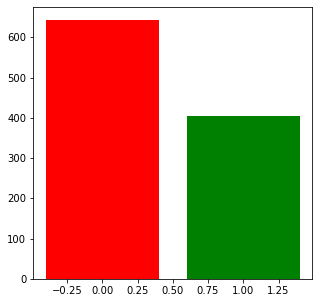

In [24]:
plt.figure(figsize=(5,5))
plt.bar(list(train['survived'].value_counts().keys()),list(train['survived'].value_counts()), color=['red','green'])
plt.show()

In [39]:
train['pclass'].value_counts()

3    568
1    259
2    220
Name: pclass, dtype: int64

pclass


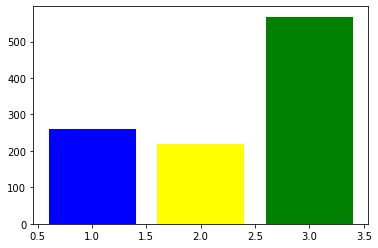

In [40]:
pclass = 'pclass'
print(pclass)
plt.bar(list(train[pclass].value_counts().keys()),list(train[pclass].value_counts()),color=['green','blue','yellow'])
plt.show()

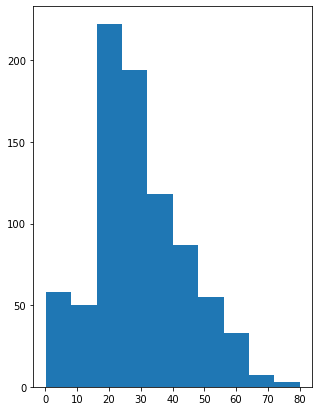

In [55]:
plt.figure(figsize=(5,7))
plt.hist(train['age'])
plt.show()

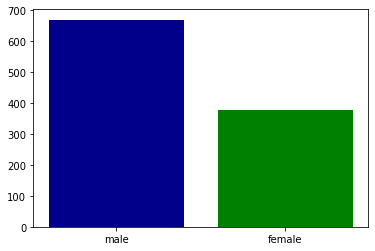

In [53]:
plt.bar(list(train['sex'].value_counts().keys()),list(train['sex'].value_counts()),color=['darkblue','g'])
plt.show()

In [42]:
train['age'].value_counts()

24.0000    38
21.0000    35
30.0000    34
22.0000    34
18.0000    29
           ..
26.5000     1
80.0000     1
70.0000     1
11.5000     1
0.6667      1
Name: age, Length: 94, dtype: int64

In [212]:
train['age'].mean()

29.91896486810552

In [213]:
train.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          213
sibsp          0
parch          0
ticket         0
fare           1
cabin        811
embarked       2
boat         656
body         949
home_dest    447
dtype: int64

In [214]:
train['survived'].isnull().sum()

0

In [215]:
train.isna().any().sum()
train.shape

(1047, 14)

In [79]:
tnm = train['age'].dropna();

In [84]:
train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
87,1,1,Daniel Mr. Robert Williams,male,27.0,0,0,113804,30.5000,NaN,S,3,NaN,Philadelphia PA
987,3,0,Mahon Miss. Bridget Delia,female,NaN,0,0,330924,7.8792,NaN,Q,NaN,NaN,NaN
1137,3,0,Razi Mr. Raihed,male,NaN,0,0,2629,7.2292,NaN,C,NaN,NaN,NaN
69,1,1,Chibnall Mrs. (Edith Martha Bowerman),female,NaN,0,1,113505,55.0000,E33,S,6,NaN,St Leonards-on-Sea England Ohio
676,3,0,Bjorklund Mr. Ernst Herbert,male,18.0,0,0,347090,7.7500,NaN,S,NaN,NaN,Stockholm Sweden New York


In [85]:
train.pop('home_dest')

87                      Philadelphia PA
987                                 NaN
1137                                NaN
69      St Leonards-on-Sea England Ohio
676           Stockholm Sweden New York
                     ...               
936                                 NaN
1027                                NaN
732                              London
1049                                NaN
801                                 NaN
Name: home_dest, Length: 1047, dtype: object

In [87]:
train.pop('body')

87     NaN
987    NaN
1137   NaN
69     NaN
676    NaN
        ..
936    NaN
1027   NaN
732    NaN
1049   NaN
801    NaN
Name: body, Length: 1047, dtype: float64

In [88]:
train.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         220
sibsp         0
parch         0
ticket        0
fare          0
cabin       813
embarked      0
boat        650
dtype: int64

In [89]:
trm = train.dropna()

In [92]:
trm.shape

(139, 12)

In [93]:
train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat
87,1,1,Daniel Mr. Robert Williams,male,27.0,0,0,113804,30.5000,NaN,S,3
987,3,0,Mahon Miss. Bridget Delia,female,NaN,0,0,330924,7.8792,NaN,Q,NaN
1137,3,0,Razi Mr. Raihed,male,NaN,0,0,2629,7.2292,NaN,C,NaN
69,1,1,Chibnall Mrs. (Edith Martha Bowerman),female,NaN,0,1,113505,55.0000,E33,S,6
676,3,0,Bjorklund Mr. Ernst Herbert,male,18.0,0,0,347090,7.7500,NaN,S,NaN


In [94]:
train.pop('boat')

87        3
987     NaN
1137    NaN
69        6
676     NaN
       ... 
936       2
1027    NaN
732     NaN
1049      C
801     NaN
Name: boat, Length: 1047, dtype: object

In [216]:
train

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
513,2,1,Nasser Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C,NaN,NaN,New York NY
344,2,1,Bentham Miss. Lilian W,female,19.0,0,0,28404,13.0000,NaN,S,12,NaN,Rochester NY
264,1,1,Simonius-Blumer Col. Oberst Alfons,male,56.0,0,0,13213,35.5000,A26,C,3,NaN,Basel Switzerland
442,2,0,Hickman Mr. Leonard Mark,male,24.0,2,0,S.O.C. 14879,73.5000,NaN,S,NaN,NaN,West Hampstead London / Neepawa MB
482,2,1,Lehmann Miss. Bertha,female,17.0,0,0,SC 1748,12.0000,NaN,C,12,NaN,Berne Switzerland / Central City IA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,3,0,Wenzel Mr. Linhart,male,32.5,0,0,345775,9.5000,NaN,S,NaN,298.0,NaN
325,2,0,Aldworth Mr. Charles Augustus,male,30.0,0,0,248744,13.0000,NaN,S,NaN,NaN,Bryn Mawr PA USA
615,3,0,Alhomaki Mr. Ilmari Rudolf,male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,NaN,NaN,Salo Finland Astoria OR
667,3,0,Barry Miss. Julia,female,27.0,0,0,330844,7.8792,NaN,Q,NaN,NaN,New York NY


In [217]:
train.shape

(1047, 14)

In [218]:
train.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          213
sibsp          0
parch          0
ticket         0
fare           1
cabin        811
embarked       2
boat         656
body         949
home_dest    447
dtype: int64

In [219]:
train.pop('cabin')

513     NaN
344     NaN
264     A26
442     NaN
482     NaN
       ... 
1285    NaN
325     NaN
615     NaN
667     NaN
690     NaN
Name: cabin, Length: 1047, dtype: object

In [100]:
train

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
87,1,1,Daniel Mr. Robert Williams,male,27.0,0,0,113804,30.5000,S
987,3,0,Mahon Miss. Bridget Delia,female,NaN,0,0,330924,7.8792,Q
1137,3,0,Razi Mr. Raihed,male,NaN,0,0,2629,7.2292,C
69,1,1,Chibnall Mrs. (Edith Martha Bowerman),female,NaN,0,1,113505,55.0000,S
676,3,0,Bjorklund Mr. Ernst Herbert,male,18.0,0,0,347090,7.7500,S
...,...,...,...,...,...,...,...,...,...,...
936,3,1,Kink-Heilmann Mrs. Anton (Luise Heilmann),female,26.0,1,1,315153,22.0250,S
1027,3,0,Moore Mr. Leonard Charles,male,NaN,0,0,A4. 54510,8.0500,S
732,3,0,Corn Mr. Harry,male,30.0,0,0,SOTON/OQ 392090,8.0500,S
1049,3,1,Nakid Mr. Sahid,male,20.0,1,1,2653,15.7417,C


In [101]:
train.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         220
sibsp         0
parch         0
ticket        0
fare          0
embarked      0
dtype: int64

In [220]:
train.groupby('parch', as_index=False)['age'].mean()

,parch,age
0,0,32.108766
1,1,25.358871
2,2,17.678419
3,3,34.600000
4,4,49.500000
5,5,39.200000
6,6,41.500000
7,9,NaN


In [225]:
train.groupby('parch')['survived'].mean()

parch
0    0.339975
1    0.589552
2    0.500000
3    0.600000
4    0.200000
5    0.200000
6    0.000000
9    0.000000
Name: survived, dtype: float64

In [111]:
train['age'] = train['age'].fillna(df['age'].mean())

In [113]:
train.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [114]:
train.shape

(1047, 10)

In [128]:
train_survived = train[['survived']]
train_age = train[['age']]

In [129]:
train_survived.shape

(1047, 1)

In [130]:
train_age.shape

(1047, 1)

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
dtc = DecisionTreeClassifier()

In [135]:
dtc.fit(train_age, train_survived)

DecisionTreeClassifier()

In [136]:
test.shape

(262, 14)

In [137]:
test.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,Allen Miss. Elisabeth Walton,female,29.0,0,0,24160,211.3375,B5,S,2,NaN,St Louis MO
10,1,0,Astor Col. John Jacob,male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,New York NY
15,1,0,Baumann Mr. John D,male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,New York NY
17,1,1,Baxter Mrs. James (Helene DeLaudeniere Chaput),female,50.0,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,Montreal PQ
18,1,1,Bazzani Miss. Albina,female,32.0,0,0,11813,76.2917,D15,C,8,NaN,NaN


In [141]:
test.pop('body')

0         NaN
10      124.0
15        NaN
17        NaN
18        NaN
        ...  
1275      NaN
1277      NaN
1282      NaN
1283      NaN
1300      NaN
Name: body, Length: 262, dtype: float64

In [142]:
test.pop('home_dest')

0       St Louis MO
10      New York NY
15      New York NY
17      Montreal PQ
18              NaN
           ...     
1275            NaN
1277            NaN
1282            NaN
1283            NaN
1300            NaN
Name: home_dest, Length: 262, dtype: object

In [143]:
test.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,Allen Miss. Elisabeth Walton,female,29.0,0,0,24160,211.3375,B5,S
10,1,0,Astor Col. John Jacob,male,47.0,1,0,PC 17757,227.5250,C62 C64,C
15,1,0,Baumann Mr. John D,male,NaN,0,0,PC 17318,25.9250,NaN,S
17,1,1,Baxter Mrs. James (Helene DeLaudeniere Chaput),female,50.0,0,1,PC 17558,247.5208,B58 B60,C
18,1,1,Bazzani Miss. Albina,female,32.0,0,0,11813,76.2917,D15,C


In [144]:
test.shape

(262, 11)

In [145]:
test.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age          43
sibsp         0
parch         0
ticket        0
fare          1
cabin       201
embarked      2
dtype: int64

In [146]:
test['age']=test['age'].fillna(test['age'].mean())

In [148]:
test.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          1
cabin       201
embarked      2
dtype: int64

In [154]:
test_age=test[['age']]

In [162]:
test_survived=test['survived']

In [155]:
test_age

,age
0,29.000000
10,47.000000
15,29.900685
17,50.000000
18,32.000000
...,...
1275,16.000000
1277,22.000000
1282,29.900685
1283,29.900685


In [156]:
pred_survived = dtc.predict(test_age)

In [164]:
pred_survived

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [166]:
test_survived.shape

(262,)

In [167]:
test_survived

0       1
10      0
15      0
17      1
18      1
       ..
1275    0
1277    1
1282    0
1283    0
1300    1
Name: survived, Length: 262, dtype: int64

In [168]:
import numpy as np
print("RMS: %r " % np.sqrt(np.mean((pred_survived - test_survived) ** 2)))

RMS: 0.6239494988372349 


In [246]:
pred_survived.shape

(262,)

In [247]:
import numpy as np
np.savetxt("predict.csv", pred_survived, delimiter=",")

In [249]:
df2 = test_survived + pred_survived
df2

0       1
10      0
15      0
17      1
18      1
       ..
1275    0
1277    1
1282    0
1283    0
1300    2
Name: survived, Length: 262, dtype: int64

In [251]:
np.savetxt("predict1.csv", pred_survived, delimiter=",")

In [252]:
df2.head()

0     1
10    0
15    0
17    1
18    1
Name: survived, dtype: int64

In [ ]:
data = {'Name': ['Smith', 'Parker'], 'ID': [101, 102], 'Language': ['Python', 'JavaScript']}  
info = pd.DataFrame(data)  
print('DataFrame Values:\n', info)  
# default CSV  
csv_data = info.to_csv()  
print('\nCSV String Values:\n', csv_data)  
    